In [2]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [3]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

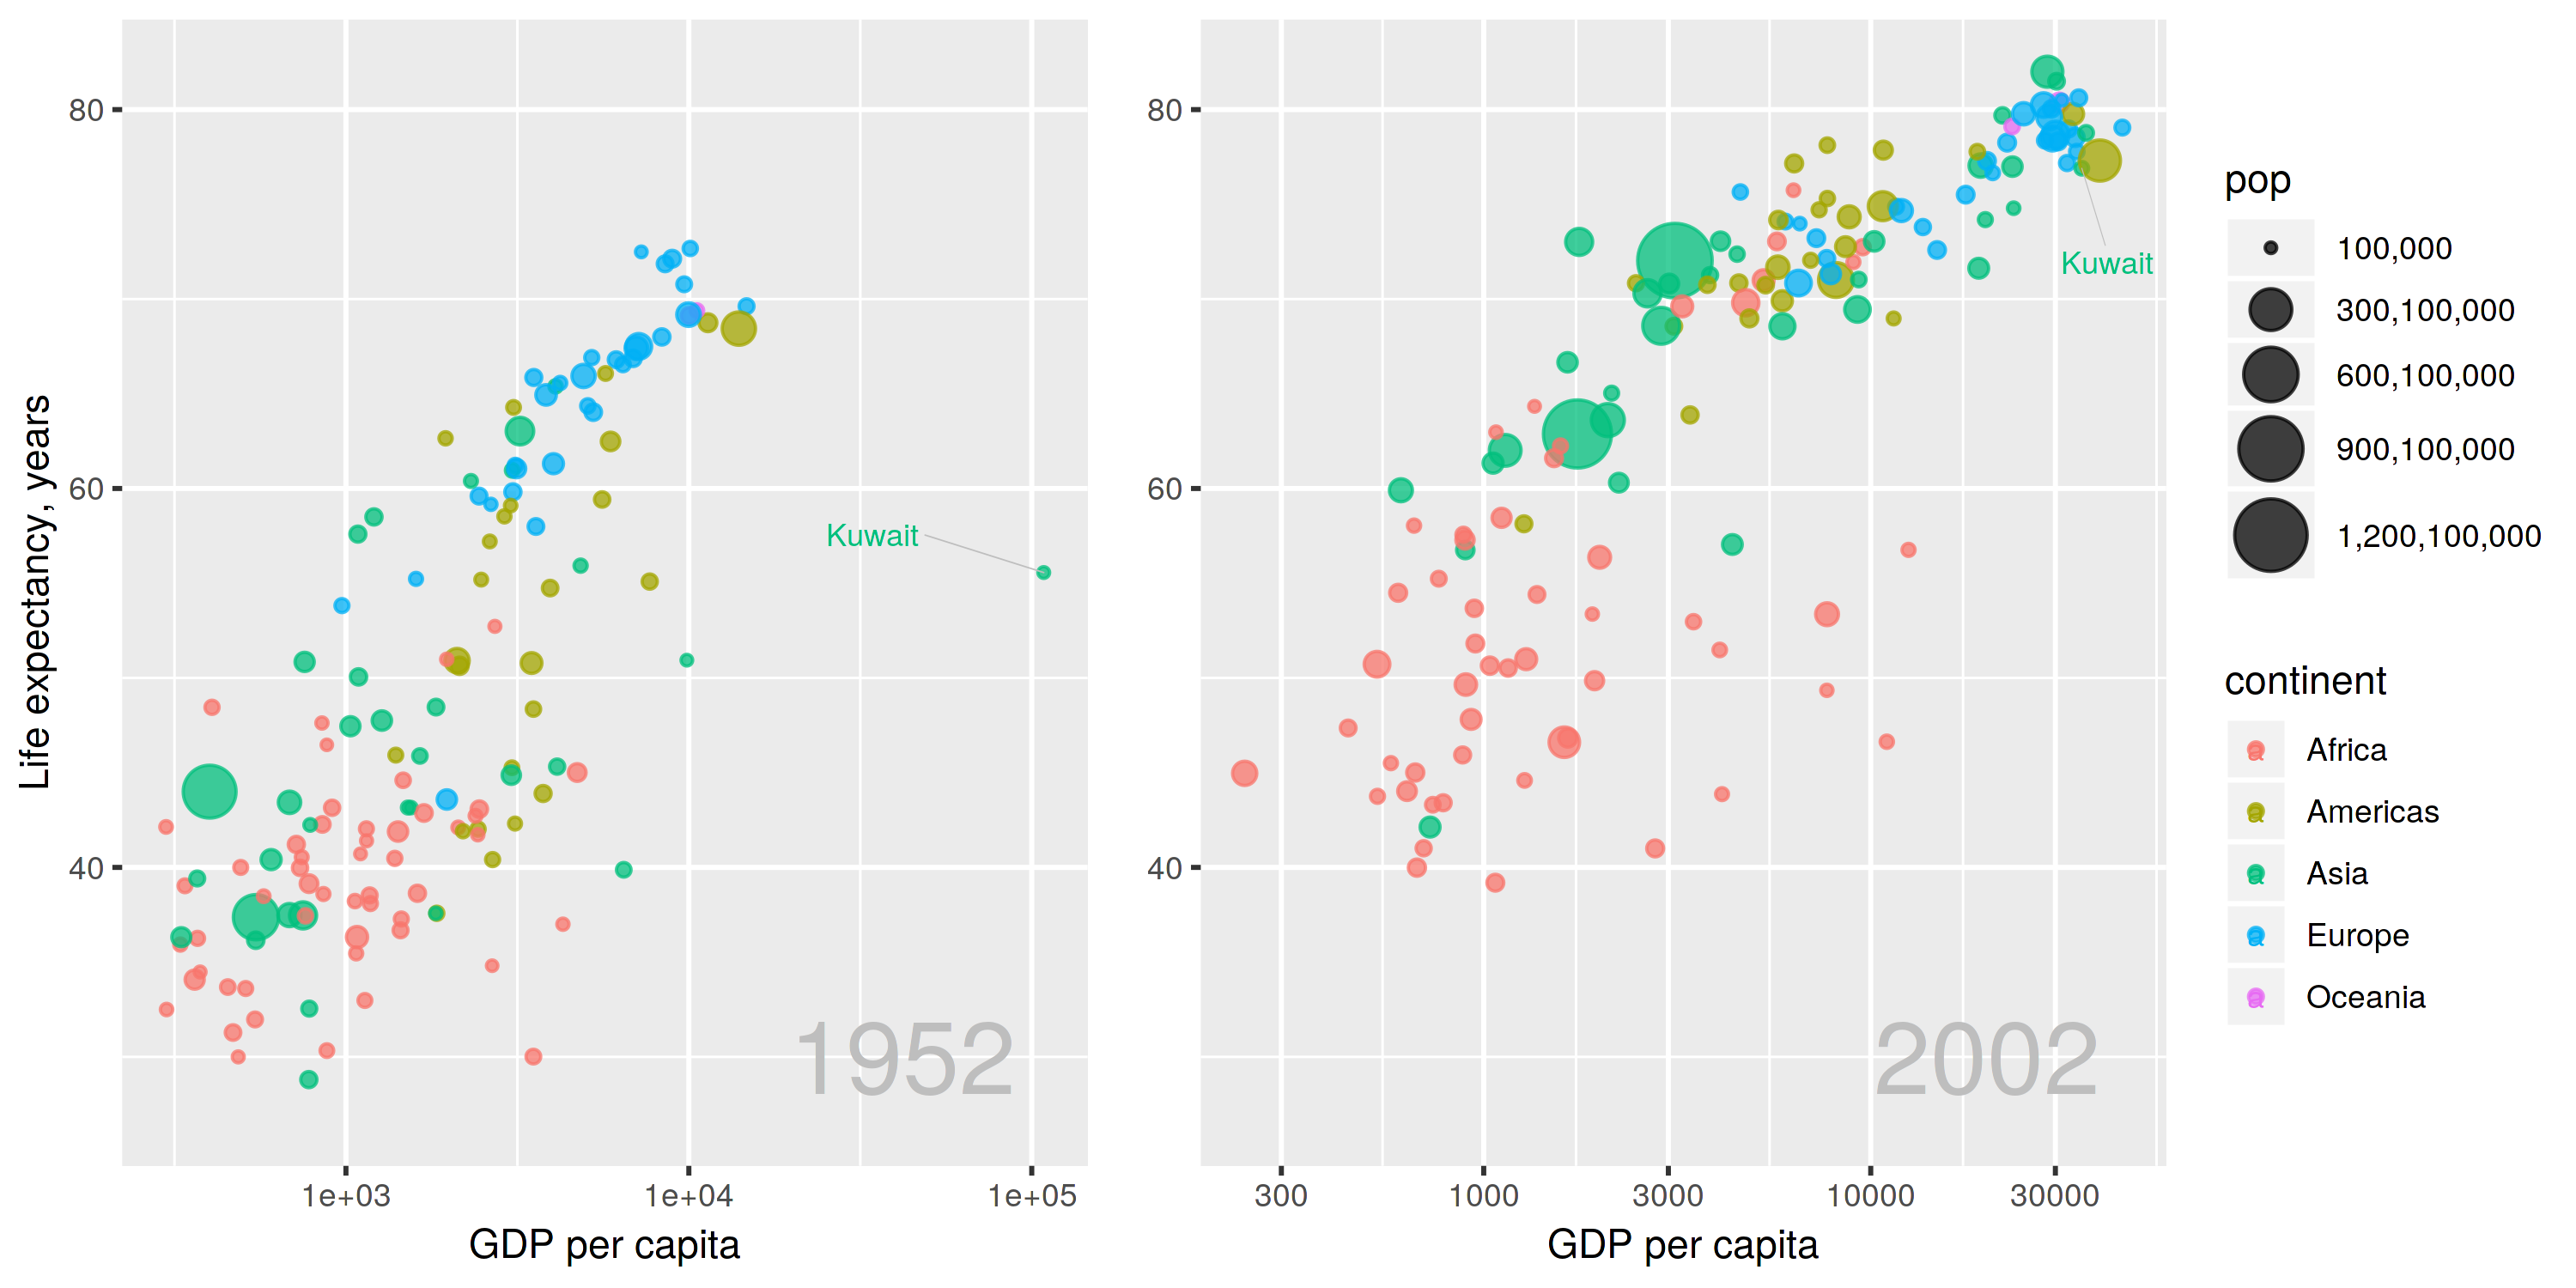

In [13]:
options(repr.plot.res=300, repr.plot.height=5, repr.plot.width=10)

##################################################################################################

labelSize=3
p = ggplot(df.1952, aes(x = gdpPercap, y = lifeExp, color = continent))
p = p + geom_point(aes(size = pop),alpha=.75)
p = p + geom_text_repel(data = df.1952.kuwait, aes(x = gdpPercap, y = lifeExp, label=country), 
                        segment.size=.15, segment.color='grey', size = labelSize, nudge_y=2, nudge_x=-.5)

#p=p+annotate(geom="text", x=1000, y=20, label = "1952", color="red", size=6)
p=p+labs(y='Life expectancy, years', x='GDP per capita')
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
p = p + ylim(c(27, 82))
p = p + scale_x_log10()
p = p + theme(legend.position = "none")
p=p + annotate("text", x = 100000-58000, y = 30, label = "1952", color='grey', size=10)

##################################################################################################
p2 = ggplot(df.2002, aes(x = gdpPercap, y = lifeExp, color = continent))
p2 = p2 + geom_point(aes(size = pop),alpha=.75)
p2 = p2 + geom_text_repel(data = df.2002.kuwait, aes(x = gdpPercap, y = lifeExp, label=country), 
                        segment.size=.1, segment.color='grey', size = labelSize, nudge_y=-5, nudge_x=3)

#p2=p2+annotate(geom="text", x=100000, y=10, label = "2002", hjust = 0, vjust = 1)
p2=p2+labs( x='GDP per capita', y=element_blank())
p2 = p2 + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
p2 = p2 + ylim(c(27, 82))
p2 = p2 + scale_x_log10()
p2=p2 + annotate("text", x = 20000, y = 30, label = "2002", color='grey', size=10)

p+p2

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!